# Datacamp Supervised Learning Chapter 1-1/4
## Import datasets from sklearn and explore

In [7]:
#Import neccessaries Modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
type(datasets)

module

In [16]:
digits = datasets.load_digits()
type(digits)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [22]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


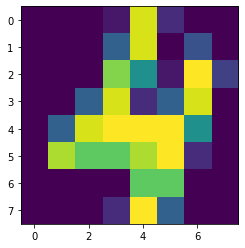

In [27]:
plt.imshow(digits['images'][1001])
plt.show()

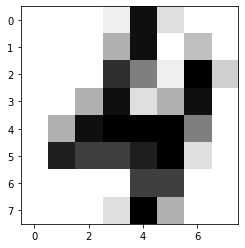

In [28]:
plt.imshow(digits['images'][1001], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Seperate Training Set and Testing Set

In [29]:
from sklearn.model_selection import train_test_split

In [45]:
print(type(digits))
print(type(digits['target']))
print(digits['target'][:5])
print(type(digits['data']))
print(digits['data'][:5])

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
[0 1 2 3 4]
<class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15.

In [82]:
X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting KNearestNeighbors

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9805555555555555


## Vary n_neighbors and see their accuracy

In [84]:
import numpy as np

no_neighb = np.arange(1,10)
#print(no_neighb)
train_accuracy = np.empty(len(no_neighb))
test_accuracy = np.empty(len(no_neighb))

for i, k in enumerate(no_neighb) :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
print(train_accuracy)
print(test_accuracy)

[1.         0.99095338 0.99304106 0.99234516 0.98956159 0.98956159
 0.99025748 0.98677801 0.9874739 ]
[0.97777778 0.98055556 0.98333333 0.98055556 0.98611111 0.98888889
 0.98888889 0.98611111 0.98055556]


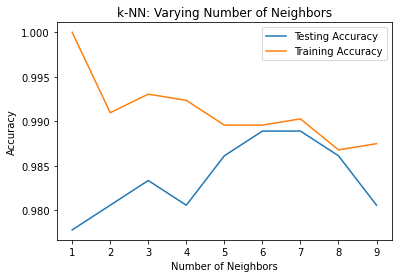

In [85]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighb, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighb, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()